In [132]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler## Handling Class Imbalance
import optuna

In [133]:
df=pd.read_excel('newsdata-1.xlsx')

In [134]:
df2=pd.read_excel(r'C:\Users\HP\Desktop\Book2.xlsx')

In [135]:
df1=pd.read_excel(r'C:\Users\HP\Desktop\news7.xlsx')

In [136]:
df3=pd.read_excel(r'C:\Users\HP\Desktop\Book3.xlsx')

In [137]:
df4=pd.read_excel(r'C:\Users\HP\Desktop\Book5.xlsx')

In [138]:
data=pd.concat([df,df1,df2,df3,df4],axis=0,ignore_index=True)

In [115]:
data.to_excel(r'C:\\Users\\HP\\Desktop\\finaldata.xlsx')

In [70]:
#df

In [71]:
#df=df[['heading','sentiment']]

In [254]:
#df1

In [139]:
data

,Unnamed: 0,heading,sentiment,para
0,0,Delhi Capitals vs Rajasthan Royals Live Score ...,0,NaN
1,1,"In Madhya Pradesh Tribal Outreach, Amit Shah D...",1,NaN
2,2,"On Twitter, Amit Mishra's Counter After Irfan ...",-1,NaN
3,3,"Poco Watch Launch Set for April 26, Buds Pro G...",1,NaN
4,4,Delhi Capitals vs Rajasthan Royals Live Score ...,0,NaN
5,5,33 Killed As Blast Rips Through Afghanistan Mo...,-1,NaN
6,6,First Pics Of IAS Topper Tina Dabi's Wedding T...,0,NaN
7,7,BJP Ally Nitish Kumar's 'Message' As He Attend...,0,NaN
8,8,"Hindus, Muslims Exchange Hugs In Delhi's Viole...",1,NaN
9,9,"""Ahead Of Everyone Including Rishabh Pant"": Ha...",1,NaN


In [140]:
data=data[['heading','sentiment']]

In [141]:
data

,heading,sentiment
0,Delhi Capitals vs Rajasthan Royals Live Score ...,0
1,"In Madhya Pradesh Tribal Outreach, Amit Shah D...",1
2,"On Twitter, Amit Mishra's Counter After Irfan ...",-1
3,"Poco Watch Launch Set for April 26, Buds Pro G...",1
4,Delhi Capitals vs Rajasthan Royals Live Score ...,0
5,33 Killed As Blast Rips Through Afghanistan Mo...,-1
6,First Pics Of IAS Topper Tina Dabi's Wedding T...,0
7,BJP Ally Nitish Kumar's 'Message' As He Attend...,0
8,"Hindus, Muslims Exchange Hugs In Delhi's Viole...",1
9,"""Ahead Of Everyone Including Rishabh Pant"": Ha...",1


In [12]:
#df=df[['heading','sentiment']]

In [261]:
#df

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heading    2360 non-null   object
 1   sentiment  2360 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.0+ KB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

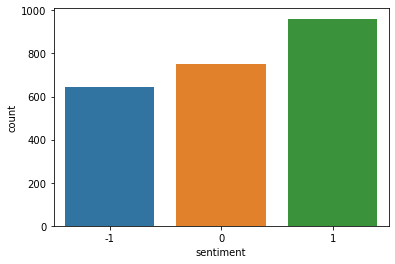

In [143]:
sns.countplot(data=data,x='sentiment')

In [144]:
data['sentiment'].value_counts()

 1    961
 0    753
-1    646
Name: sentiment, dtype: int64

In [145]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
data_majority = data[(data['sentiment']==1)] 
data_minority = data[(data['sentiment']==-1)] 
data_minority1 = data[(data['sentiment']==0)] 
# upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 820, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
news = pd.concat([data_minority_upsampled, data_majority,data_minority1])


<AxesSubplot:xlabel='sentiment', ylabel='count'>

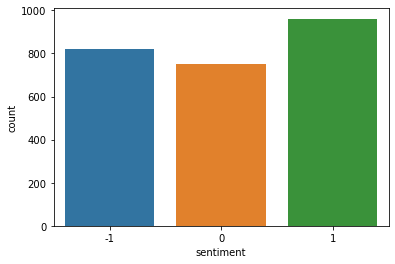

In [148]:
sns.countplot(data=news,x='sentiment')

In [146]:
news['sentiment'].value_counts()

 1    961
-1    820
 0    753
Name: sentiment, dtype: int64

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import *
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline

In [150]:
X = news[['heading']]
Y = news['sentiment']

In [151]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [152]:
x_train.shape[0] == y_train.shape[0]

True

In [153]:
vectorizer = TfidfVectorizer(min_df=0.001)
vectorizer.fit(x_train.heading)
x_vec = vectorizer.transform(x_train.heading)

In [154]:
x_vec

<2027x1923 sparse matrix of type '<class 'numpy.float64'>'
	with 19150 stored elements in Compressed Sparse Row format>

In [155]:
lr = LinearSVC()
lr.fit(x_vec,y_train)

LinearSVC()

In [156]:
train_pred = lr.predict(x_vec)
test_pred = lr.predict(vectorizer.transform(x_test.heading))

In [157]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       662
           0       0.96      0.93      0.94       605
           1       0.95      0.96      0.96       760

    accuracy                           0.96      2027
   macro avg       0.96      0.96      0.96      2027
weighted avg       0.96      0.96      0.96      2027



In [158]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.72      0.83      0.77       158
           0       0.61      0.65      0.63       148
           1       0.76      0.63      0.69       201

    accuracy                           0.70       507
   macro avg       0.70      0.70      0.70       507
weighted avg       0.70      0.70      0.70       507



In [169]:
model_pipeline = make_pipeline(CountVectorizer(),LinearSVC())

In [170]:
model_pipeline.fit(x_train.heading,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('linearsvc', LinearSVC())])

In [171]:
params = {}
params['linearsvc__C'] = np.linspace(0,10,30)
params['linearsvc__class_weight'] = [None,'balanced']

In [172]:
grid_model = GridSearchCV(model_pipeline,param_grid=params,cv=2,scoring='f1_macro',n_jobs=-1)

In [173]:
grid_model.fit(x_train.heading,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('linearsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'linearsvc__C': array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ]),
                         'linearsvc__class_weight': [None, 'balanced']},
             scoring='f1_macro')

In [174]:
grid_model.best_score_

0.6722230265363427

In [175]:
grid_model.best_params_

{'linearsvc__C': 0.3448275862068966, 'linearsvc__class_weight': 'balanced'}

In [176]:
model = grid_model.best_estimator_

In [177]:
train_pred = model.predict(x_train.heading)
test_pred = model.predict(x_test.heading)

In [178]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       662
           0       0.97      0.97      0.97       605
           1       0.98      0.97      0.98       760

    accuracy                           0.98      2027
   macro avg       0.98      0.98      0.98      2027
weighted avg       0.98      0.98      0.98      2027



In [179]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.76      0.80      0.78       158
           0       0.59      0.64      0.62       148
           1       0.73      0.66      0.69       201

    accuracy                           0.70       507
   macro avg       0.69      0.70      0.70       507
weighted avg       0.70      0.70      0.70       507



In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,roc_auc_score
import optuna
from sklearn.pipeline import make_pipeline

In [181]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
from selenium_stealth import stealth
import bs4
import numpy as np
import random
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_val_predict
from sklearn.svm import SVC,LinearSVC

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,roc_auc_score
import optuna
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

from IPython.display import display, Markdown,HTML

In [182]:
def objectivel(trial,x_vec,y_train):
    c = trial.suggest_float('C',0,100)
    model = LinearSVC(C=c)
    score = cross_val_score(model,x_vec,y_train,n_jobs=-1,cv=5,scoring='f1_macro')
    return score.mean()

study1 = optuna.create_study(direction='maximize',study_name = 'text_classflinear')
func = lambda trial: objectivel(trial,x_vec,y_train)
study1.optimize(func,n_trials=100,n_jobs=-1)

[I 2022-05-04 19:39:10,710] A new study created in memory with name: text_classflinear
[I 2022-05-04 19:39:10,905] Trial 0 finished with value: 0.6999516658896512 and parameters: {'C': 14.439205632139828}. Best is trial 0 with value: 0.6999516658896512.
[I 2022-05-04 19:39:11,132] Trial 3 finished with value: 0.6923409688540997 and parameters: {'C': 68.06138745457098}. Best is trial 0 with value: 0.6999516658896512.
[I 2022-05-04 19:39:11,287] Trial 4 finished with value: 0.6943612960021043 and parameters: {'C': 47.951106345482785}. Best is trial 0 with value: 0.6999516658896512.
[I 2022-05-04 19:39:11,405] Trial 7 finished with value: 0.698598211887371 and parameters: {'C': 19.979375480411832}. Best is trial 0 with value: 0.6999516658896512.
[I 2022-05-04 19:39:11,538] Trial 5 finished with value: 0.6938649796657417 and parameters: {'C': 79.91773669726602}. Best is trial 0 with value: 0.6999516658896512.
[I 2022-05-04 19:39:11,705] Trial 1 finished with value: 0.6933428095274432 and p

In [183]:
study1.best_params

{'C': 0.6154882196910236}

In [184]:
lsvco = LinearSVC(C=0.6154882196910236)
lsvco.fit(x_vec,y_train)

LinearSVC(C=0.6154882196910236)

In [185]:
train_pred = lsvco.predict(x_vec)
test_pred = lsvco.predict(vectorizer.transform(x_test.heading))
print("Train : ")
print(classification_report(train_pred,y_train))
print("Test : ")
print(classification_report(test_pred,y_test))

Train : 
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       671
           0       0.90      0.94      0.92       576
           1       0.95      0.93      0.94       780

    accuracy                           0.94      2027
   macro avg       0.94      0.94      0.94      2027
weighted avg       0.94      0.94      0.94      2027

Test : 
              precision    recall  f1-score   support

          -1       0.82      0.72      0.76       180
           0       0.64      0.60      0.62       158
           1       0.63      0.75      0.69       169

    accuracy                           0.69       507
   macro avg       0.70      0.69      0.69       507
weighted avg       0.70      0.69      0.69       507



In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rfc = RandomForestClassifier()
rfc.fit(x_vec,y_train)

RandomForestClassifier()

In [188]:
x_vec

<2027x1923 sparse matrix of type '<class 'numpy.float64'>'
	with 19150 stored elements in Compressed Sparse Row format>

In [189]:
y_train.shape

(2027,)

In [190]:
train_pred = rfc.predict(x_vec)
test_pred = rfc.predict(vectorizer.transform(x_test.heading))

In [191]:
print('Train :')
print(classification_report(train_pred,y_train))
print("Test : ")
print(classification_report(test_pred,y_test))

Train :
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       669
           0       0.95      0.98      0.97       586
           1       0.99      0.97      0.98       772

    accuracy                           0.98      2027
   macro avg       0.98      0.98      0.98      2027
weighted avg       0.98      0.98      0.98      2027

Test : 
              precision    recall  f1-score   support

          -1       0.78      0.77      0.77       162
           0       0.57      0.68      0.62       124
           1       0.74      0.67      0.70       221

    accuracy                           0.70       507
   macro avg       0.70      0.70      0.70       507
weighted avg       0.71      0.70      0.70       507



In [45]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [192]:
def objectiverfc(trial,x_vec,y_train):
    n = trial.suggest_int('n_estimators',0,1000)
    c = trial.suggest_categorical('criterion',['gini','entropy'])
    md = trial.suggest_int('max_depth',1,100)
    model = RandomForestClassifier(n_estimators=n,criterion=c,max_depth=md)
    score = cross_val_score(model,x_vec,y_train,n_jobs=-1,cv=5,scoring='f1_macro')
    return score.mean()

study3 = optuna.create_study(direction='maximize',study_name = 'text_classfrfc')
func = lambda trial: objectiverfc(trial,x_vec,y_train)
study3.optimize(func,n_trials=15,n_jobs=-1)

[I 2022-05-04 19:41:47,737] A new study created in memory with name: text_classfrfc
[I 2022-05-04 19:41:50,884] Trial 1 finished with value: 0.44313965137357647 and parameters: {'n_estimators': 575, 'criterion': 'gini', 'max_depth': 4}. Best is trial 1 with value: 0.44313965137357647.
[I 2022-05-04 19:41:51,636] Trial 0 finished with value: 0.6968196139223879 and parameters: {'n_estimators': 405, 'criterion': 'entropy', 'max_depth': 61}. Best is trial 0 with value: 0.6968196139223879.
[I 2022-05-04 19:41:56,958] Trial 3 finished with value: 0.4483722467648638 and parameters: {'n_estimators': 538, 'criterion': 'gini', 'max_depth': 4}. Best is trial 0 with value: 0.6968196139223879.
[I 2022-05-04 19:41:59,130] Trial 2 finished with value: 0.5071971987878022 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 22}. Best is trial 0 with value: 0.6968196139223879.
[I 2022-05-04 19:42:02,142] Trial 6 finished with value: 0.7021736415354134 and parameters: {'n_estimators': 26

In [193]:
study3.best_params

{'n_estimators': 107, 'criterion': 'entropy', 'max_depth': 99}

In [197]:
rfc = RandomForestClassifier(n_estimators= 107, criterion='entropy', max_depth=99)
rfc.fit(x_vec,y_train)

RandomForestClassifier(criterion='entropy', max_depth=99, n_estimators=107)

In [198]:
train_pred = rfc.predict(x_vec)
test_pred = rfc.predict(vectorizer.transform(x_test.heading))

In [199]:
print('Train :')
print(classification_report(train_pred,y_train))
print("Test : ")
print(classification_report(test_pred,y_test))

Train :
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       663
           0       0.93      0.99      0.96       572
           1       0.99      0.95      0.97       792

    accuracy                           0.97      2027
   macro avg       0.97      0.97      0.97      2027
weighted avg       0.97      0.97      0.97      2027

Test : 
              precision    recall  f1-score   support

          -1       0.77      0.82      0.79       149
           0       0.51      0.68      0.58       112
           1       0.78      0.64      0.70       246

    accuracy                           0.70       507
   macro avg       0.69      0.71      0.69       507
weighted avg       0.72      0.70      0.70       507



In [52]:
vc = vectorizer.transform(['7 people where killed in Russia'])
print(lr.predict(vc))
print(rfc.predict(vc))
print(lsvco.predict(vc))

[-1]
[-1]
[-1]


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [201]:
X,Y= news.heading,news.sentiment

In [202]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [203]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [204]:
x_train_vec = vectorizer.transform(x_train)

In [205]:
x_test_vec = vectorizer.transform(x_test)

In [206]:
pca = PCA()
pca.fit(x_train_vec.A)

PCA()

In [207]:
x_train_vec.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [208]:
pca = PCA()
pca.fit(x_train_vec.A)

PCA()

In [209]:
pca.explained_variance_ratio_*100

array([1.57841685e+00, 6.76019196e-01, 5.99499049e-01, ...,
       1.03132405e-39, 3.62861388e-60, 5.58742169e-61])

In [210]:
len(pca.explained_variance_ratio_)

2280

In [211]:
cum_evar = np.cumsum(pca.explained_variance_ratio_)
print(len(cum_evar[cum_evar < 0.90]))

1099


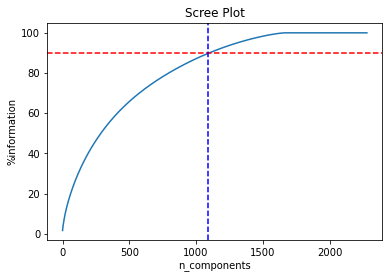

In [212]:
sns.lineplot(x=np.arange(0,pca.n_components_),y=np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('n_components')
plt.ylabel('%information')
plt.title('Scree Plot')
plt.axhline(90,color='red',linestyle='--')
plt.axvline(1091,color='blue',linestyle='--')
plt.show()

In [213]:
pca = PCA(n_components=1099)
pca.fit(x_train_vec.A)

PCA(n_components=1099)

In [214]:
train_pca = pca.transform(x_train_vec.A)

In [215]:
train_pca

array([[-0.0335817 ,  0.00892357, -0.08342839, ..., -0.00672962,
        -0.01231437,  0.01218543],
       [-0.0405171 , -0.00965039,  0.01976712, ..., -0.01885475,
         0.00416399, -0.00806915],
       [-0.02803758, -0.01291002, -0.05590642, ..., -0.00678334,
        -0.00493158, -0.01172644],
       ...,
       [-0.01404201,  0.04157117, -0.04831406, ...,  0.00149329,
        -0.00312375, -0.00777227],
       [ 0.00072419, -0.01370991,  0.06459641, ...,  0.05157808,
        -0.01631332,  0.01339837],
       [-0.01147712, -0.01409479,  0.07078138, ...,  0.00995864,
         0.01213135,  0.00027529]])

In [216]:
test_pca = pca.transform(x_test_vec.A)

In [217]:
from xgboost import XGBClassifier

import numpy as np
import xgboost as xgb


In [218]:
 import sklearn
sklearn.__version__

'1.0.2'

In [219]:
model = XGBClassifier()
model.fit(train_pca,y_train)

[19:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [220]:
train_pred = cross_val_predict(model,train_pca,y_train)
test_pred = model.predict(test_pca)

[19:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [221]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict

In [222]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          -1       0.84      0.78      0.81       747
           0       0.62      0.55      0.59       679
           1       0.65      0.76      0.70       854

    accuracy                           0.70      2280
   macro avg       0.71      0.69      0.70      2280
weighted avg       0.71      0.70      0.70      2280



In [223]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.75      0.92      0.83        73
           0       0.67      0.51      0.58        74
           1       0.72      0.73      0.73       107

    accuracy                           0.72       254
   macro avg       0.71      0.72      0.71       254
weighted avg       0.71      0.72      0.71       254



## Save the Model to Disk

In [ ]:
import pickle

In [ ]:
filename='sentiment_analysis.sav'
pickle.dump(model,open(filename,'wb'))